## Presentation Figures

In [1]:
# imports
import seaborn as sns
from matplotlib import pyplot as plt
import xarray
import h5py 

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

# imports
from importlib import reload

from ulmo import io as ulmo_io
import numpy as np
from ulmo import io as ulmo_io
from ulmo.viirs import io as viirs_io
from ulmo.viirs import extract as viirs_extract
from ulmo.plotting import plotting
from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.llc import plotting as llc_plotting

from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs
from ulmo.plotting import plotting as ulmo_plotting

sns.set_style('whitegrid')
sns.set_context('notebook')
pal, cm = plotting.load_palette()

## Full Tables

In [2]:
viirs_tbl = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_all_99clear_std.parquet')
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_all_99clear_std.parquet
Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


## Year by year tables

In [3]:
modis2012 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2012_95clear_128x128_preproc_std.h5')
modis2013 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2013_95clear_128x128_preproc_std.h5')
modis2014 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2014_95clear_128x128_preproc_std.h5')
modis2015 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2015_95clear_128x128_preproc_std.h5')
modis2016 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2016_95clear_128x128_preproc_std.h5')
modis2017 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2017_95clear_128x128_preproc_std.h5')
modis2018 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2018_95clear_128x128_preproc_std.h5')
modis2019 = np.where(modis_tbl.pp_file == 's3://modis-l2/PreProc/MODIS_R2019_2019_95clear_128x128_preproc_std.h5')

In [4]:
modis_tbl12 = modis_tbl[modis2012[0][0]:modis2012[0][-1]]
modis_tbl13 = modis_tbl[modis2013[0][0]:modis2013[0][-1]]
modis_tbl14 = modis_tbl[modis2014[0][0]:modis2014[0][-1]]
modis_tbl15 = modis_tbl[modis2015[0][0]:modis2015[0][-1]]
modis_tbl16 = modis_tbl[modis2016[0][0]:modis2016[0][-1]]
modis_tbl17 = modis_tbl[modis2017[0][0]:modis2017[0][-1]]
modis_tbl18 = modis_tbl[modis2018[0][0]:modis2018[0][-1]]
modis_tbl19 = modis_tbl[modis2019[0][0]:modis2019[0][-1]]

In [2]:
viirs_tbl12 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2012_std.parquet')
viirs_tbl13 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2013_std.parquet')
viirs_tbl14 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2014_std.parquet')
viirs_tbl15 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2015_std.parquet')
viirs_tbl16 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2016_std.parquet')
viirs_tbl17 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2017_std.parquet')
viirs_tbl18 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2018_std.parquet')
viirs_tbl19 = ulmo_io.load_main_table('s3://viirs/Tables/VIIRS_2019_std.parquet')

Read main table: s3://viirs/Tables/VIIRS_2012_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2013_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2014_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2015_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2016_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2017_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2018_std.parquet
Read main table: s3://viirs/Tables/VIIRS_2019_std.parquet


In [4]:
len(viirs_tbl12)+len(viirs_tbl13)+len(viirs_tbl14)+len(viirs_tbl15)+len(viirs_tbl16)+len(viirs_tbl17)+len(viirs_tbl18)+len(viirs_tbl19)

8845316

## High and Low LL 

In [16]:
viirs_cutouts = ('s3://viirs/PreProc/VIIRS_2013_95clear_192x192_preproc_viirs_std.h5')
modis = ('s3://modis-l2/PreProc/MODIS_R2019_2013_95clear_128x128_preproc_std.h5')

In [17]:
with ulmo_io.open(viirs_cutouts, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [25]:
def plt_ex(extr):
    fig = plt.figure(figsize=(6,12))
    img = plt.imshow(extr, origin='lower', cmap=cm)#, vmin=-3)
    cb = plt.colorbar(img, fraction=0.020, pad=0.04)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.show()

In [27]:
high = np.max(viirs_tbl13.LL.values)
low = 's3://viirs/data/2013/089/20130330164000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.61-v02.0-fv01.0.nc'

In [37]:
low_LL = viirs_tbl13.LL < -21032.
high_LL = viirs_tbl13.LL > 1050.

In [38]:
low = viirs_tbl13[low_LL]
high = viirs_tbl13[high_LL]

In [57]:
low.pp_idx
#high.pp_idx

302744    980664
Name: pp_idx, dtype: int64

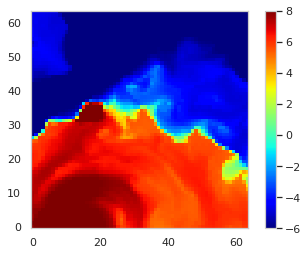

In [59]:
lowa = ((ex_hf['valid'][980664, 0, ...]))
#print(lowa)
plt.imshow(lowa, vmin=-6,vmax=8,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()
plt.grid(False)

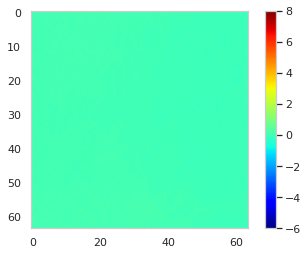

In [53]:
lowa = ((ex_hf['valid'][456442, 0, ...]))
#print(lowa)
plt.imshow(lowa, vmin=-6,vmax=8,cmap='jet')
plt.colorbar()
plt.grid(False)

## Normalized Distribution of LL Outputs

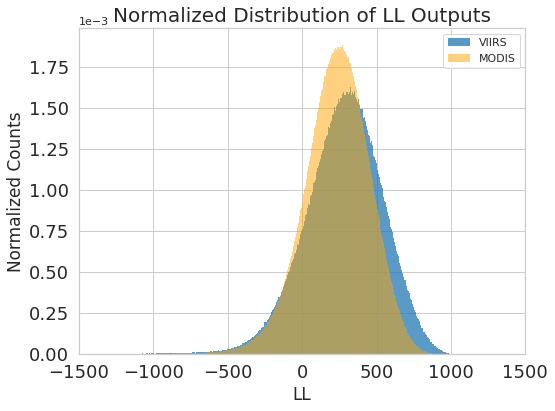

In [85]:

fig = plt.figure(figsize=(8,6))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
plt.xlim(-1500,1500)
plt.title('Normalized Distribution of LL Outputs',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.legend()
plt.ylabel('Normalized Counts')
plt.savefig('test.png')
plt.show()

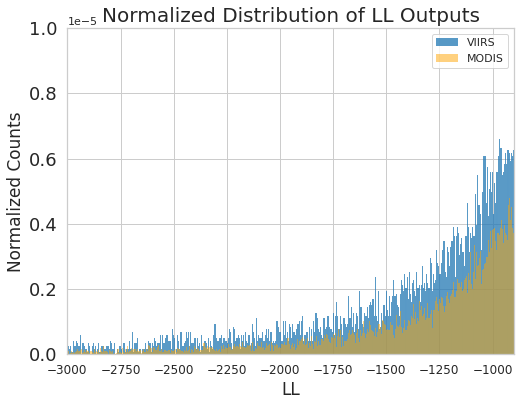

In [84]:

fig = plt.figure(figsize=(8,6))

ax = sns.histplot(data=viirs_tbl, x='LL',alpha=0.75, stat='density',label = 'VIIRS')
ax = sns.histplot(data=modis_tbl, x='LL',color='orange',alpha=0.5, stat='density',label = 'MODIS')
plotting.set_fontsize(ax, 17.)
ax.set_xlim(-3000,-900)
ax.set_ylim(0,0.0000100)

plt.title('Normalized Distribution of LL Outputs',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=18)
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ylabel('Normalized Counts')
plt.legend()
plt.savefig('test1.png')
plt.show()

## The Data

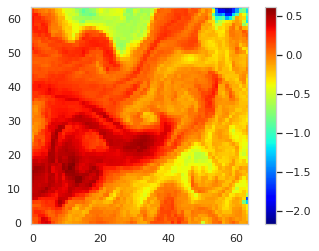

In [95]:
lowa = ((ex_hf['valid'][5384, 0, ...]))
#print(lowa)
plt.imshow(lowa,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()
plt.grid(False)
plt.savefig('64_1')

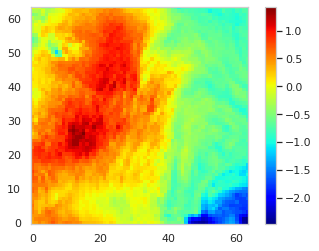

In [94]:
lowa = ((ex_hf['valid'][535684, 0, ...]))
#print(lowa)
plt.imshow(lowa,cmap='jet')
plt.colorbar()
plt.gca().invert_yaxis()
plt.grid(False)
plt.savefig('64_2')

In [31]:
ex_file = 's3://viirs/Extractions/VIIRS_2013_95clear_192x192_inpaint.h5'

with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [32]:
low = ex_hf['fields'][302744,...]

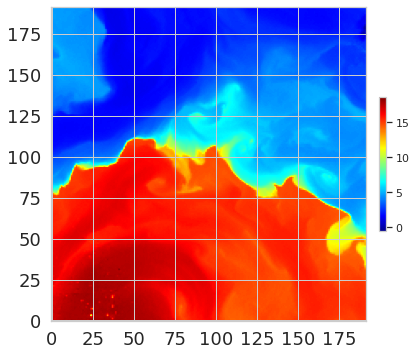

In [33]:
plt_ex(low)

In [34]:
low = ex_hf['fields'][382744,...]

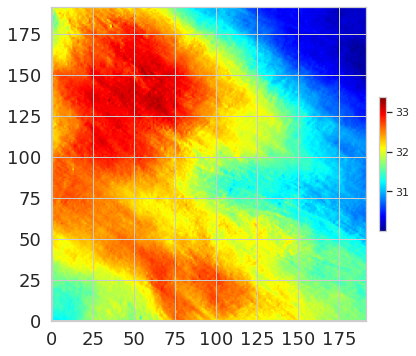

In [35]:
plt_ex(low)

In [19]:
ex_file = 's3://modis-l2/Extractions/MODIS_R2019_2011_day_95clear_128x128_inpaint.h5'


with ulmo_io.open(ex_file, 'rb') as f:
    ex_hf = h5py.File(f, 'r')

In [21]:
low1 = ex_hf['fields'][382744,...]


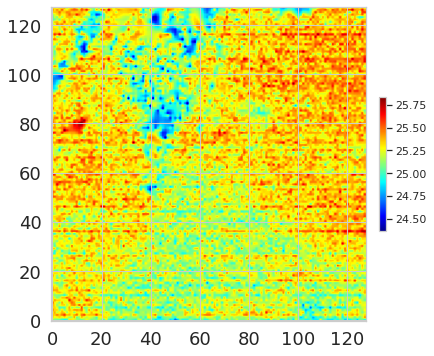

In [26]:
plt_ex(low1)